# Project Overview

# Importing Basic Libraries

In [1]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\kalstedh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# First Inpection: Most Popular Baby Names in 2018

In [2]:
#Here we are simply reading in the dataset

df = pd.read_csv("us_baby_names.csv")

In [3]:
#Brief look at the dataset

df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [4]:
#Here we are checking the unique values in each column

df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [5]:
#Here we are just checking basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [6]:
#Here we are converting gender to a category instead of a string to save memory

df.Gender = df.Gender.astype("category")

In [7]:
#As you can see we went from 59.7MB of memory to 46.7MB of memory just from the conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Name    object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 46.7+ MB


In [8]:
#Here we are creating a separate dataframe based solely on name data from 2018

names_2018 = df[df.Year == 2018].copy()

In [9]:
#Here is a brief look at the new dataframe

names_2018.head()

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928


In [10]:
#Here we are creating a function to help pull data from our dataframe
#We are able to grab the year, gender, and then the largest amount we denot (n)
#So if n = 10, we get the 10 largest amounts of baby names for that year

def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [11]:
#Here are the top ten most popular Female baby names in 2018

most_pop(2018, "F", 10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [12]:
#Here are the top ten most popular Male baby names in 2018

most_pop(2018, "M", 10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


# Evergreen Names (1880-2018)

In [13]:
#Here we are passing the 20 most popular female names in 2018 into a separate dataframe

f_2018 = most_pop(2018, "F", 20)

In [14]:
#Here we are passing the 20 most popular female names in 1880 into a separate dataframe

f_1880 = most_pop(1880, "F", 20)

In [15]:
#Here we are joining the 2018 and 1880 dataframes together

f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], 
                                              how = 'inner', on = "Name", suffixes=("_2018", "_1880"))

In [16]:
#Here we are passing the 20 most popular male names in 2018 into a separate dataframe

m_2018 = most_pop(2018, "M", 20)

In [17]:
#Here we are passing the 20 most popular male names in 1880 into a separate dataframe

m_1880 = most_pop(1880, "M", 20)

In [18]:
#Here we are joining the 2018 and 1880 dataframes together

m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], 
                                              how = 'inner', on = "Name", suffixes=("_2018", "_1880"))

In [19]:
#Here is a look at our female dataframe
#Looks like Emma, Elizabeth, and Ella have been popular girls names over time

f_evergreen.head()

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [20]:
#Here is a look at our male dataframe
#Looks like William, James, and Henry have been pretty common for a long time

m_evergreen.head()

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


# Advanced Data Aggregation

In [21]:
#Here we are simply reading in the dataset

df = pd.read_csv("us_baby_names.csv")

In [22]:
#Here we are grouping the dataframe by name and gender
#Then, we are counting how much of each name is in the dataset
#For example it looks like there are 114 Aabans in the dataset
#We are setting "Name" as the index with level = -1

df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [23]:
#Here we are creating many aggregations
#We are first starting with name and gender
#Then we have sub-aggregates for those categories
#We start with the the count of names per gender
#Then we count the number of years the name appears in
#Then we have first year the name appeares in the dataset
#Then we have the last year the name appears in the dataset
#Finally we have the most times a name occured within a single year

agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"),
                                  First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                   Max_Count = ("Count", "max")) 

In [24]:
#Here is a look at the aggregations we created

agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [25]:
#Here we are creating a function called "best_year"
#For each combo of name and gender, we get the year with the highest count

def best_year(group):
    return group.nlargest(1, "Count").Year

In [26]:
#Here we are creating a separate dataframe based on the function we created above
#This takes a LONG time to run the code

best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [27]:
#Here is a brief look at the dataframe

best_y.head()

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
Name: Year, dtype: int64

In [28]:
#Here we are dropping the column with the unnecessary row combinations

best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [29]:
#Here we are adding the best year data as a column to the agg dataframe we created above

agg["Best_Year"] = best_y.droplevel(-1)

In [30]:
#The columns look nice and organized

agg

,,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
Name,Gender,,,,,,
Aaban,M,114,11,2007,2018,16,2014
Aabha,F,35,5,2011,2016,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


In [31]:
#Here we are resetting the index so we can make sure that name and gender are columns instead of indices

agg.reset_index(inplace = True)

In [32]:
#Here are all instances of Mary-Female

agg[(agg.Name == "Mary") & (agg.Gender == "F")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
68679,Mary,F,4125675,139,1880,2018,73985,1921


In [33]:
#Here are all instances of Mary-Male

agg[(agg.Name == "Mary") & (agg.Gender == "M")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
68680,Mary,M,15165,131,1880,2014,340,1930


# Most Popular Names of All Time

In [34]:
#Here we are grouping the ten most popular names per Gender
#Mary is the most popular girls name and James the most popular boys name

agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [35]:
#Here we are converting the aggregation above into a separate dataframe

all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

In [36]:
#Here is what the dataframe looks like

all_times.head()

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                    
F      68679       Mary      F  4125675      139        1880       2018   
       30706  Elizabeth      F  1638349      139        1880       2018   
       79184   Patricia      F  1572016      135        1884       2018   
       46567   Jennifer      F  1467207      101        1916       2018   
       62973      Linda      F  1452668      139        1880       2018   

              Max_Count  Best_Year  
Gender                              
F      68679      73985       1921  
       30706      20744       1990  
       79184      56442       1951  
       46567      63603       1972  
       62973      99689       1947

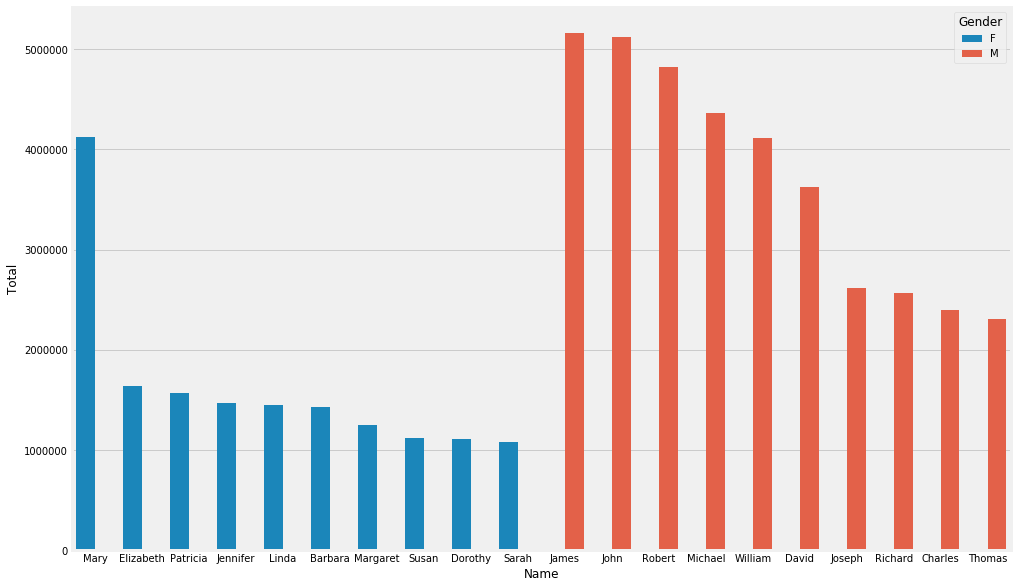

In [37]:
#Here we are visualizing with a bar plot the 10 most popular names per gender


plt.figure(figsize = (15,10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

# General Trends Over Time 1880-2018

In [38]:
#Here we are setting the decimal place in floats to 0

pd.options.display.float_format = '{:.0f}'.format

In [39]:
#Here we are creating a dataframe with the number of babies per year

babies_per_year = df.groupby("Year").Count.sum()

In [40]:
#Here is what the dataframe looks like

babies_per_year.head()

Year
1880    201484
1881    192696
1882    221533
1883    216944
1884    243461
Name: Count, dtype: int64

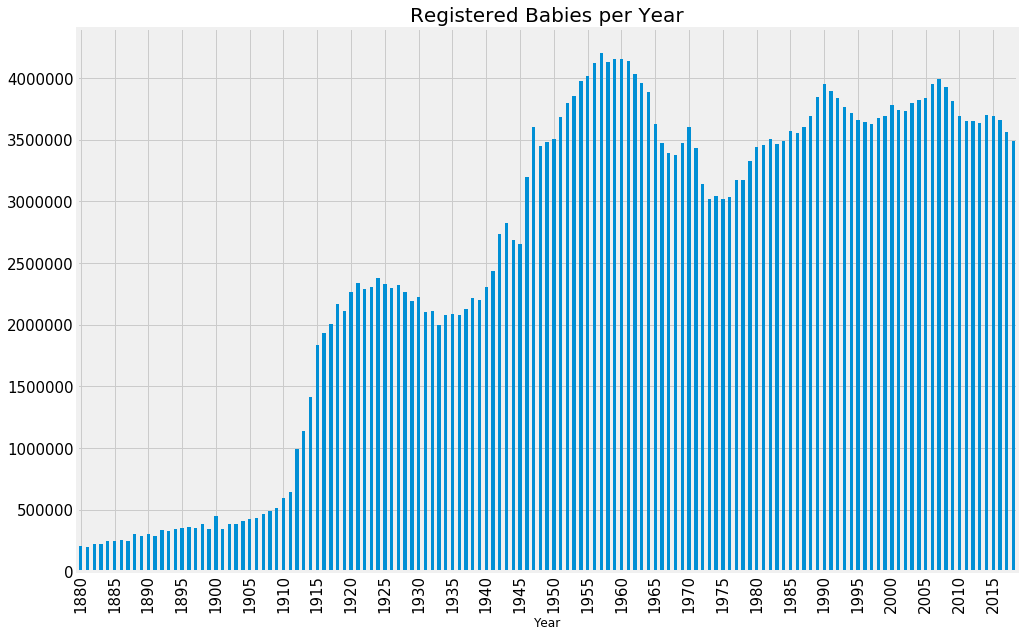

In [41]:
#Here we are using a bar plot to visualize the number of babies born per year

babies_per_year.plot(kind = 'bar', y = "Count", figsize = (15,10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels = range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [43]:
#Here we are creating a new dataframe based on the different names per year

diff_names = df.groupby("Year").Name.count()

In [44]:
#Here is a brief look at that

diff_names.head()

Year
1880    2000
1881    1935
1882    2127
1883    2084
1884    2297
Name: Name, dtype: int64

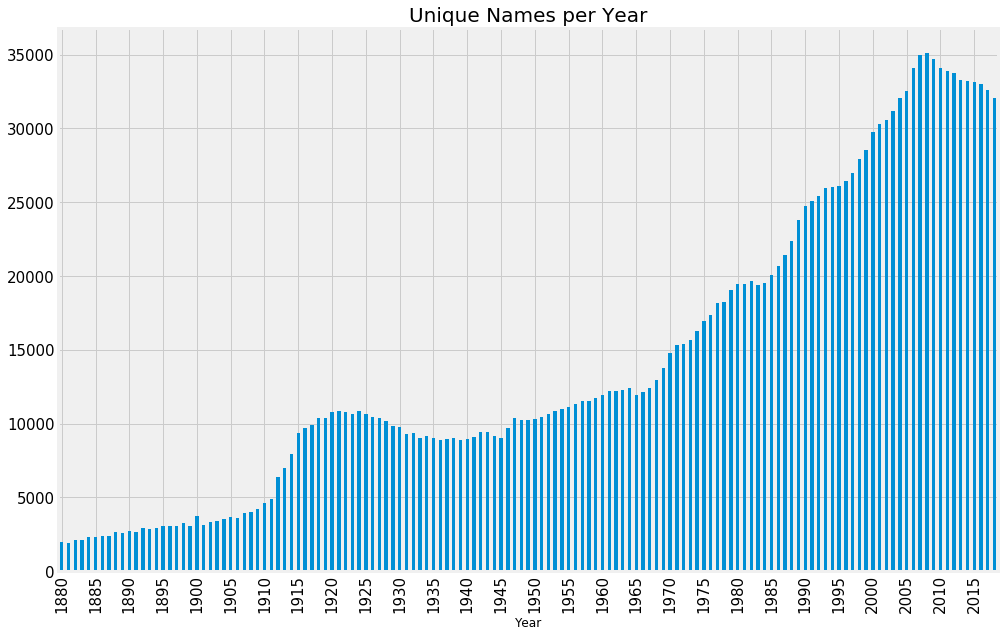

In [45]:
#Here we are visualizing with a bar chart the unique names per year over time

diff_names.plot(kind = 'bar', y = "Count", figsize = (15,10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels = range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

# Creating the Features "Popularity" and "Rank"

In [46]:
#Here we are splitting each year by gender and seeing how many boys and girls were born each year

df.groupby(["Year", "Gender"]).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [47]:
#Here is an example of how to find popularity of a person's name
#There were 7065 female "Marys" in 1880. There were 90994 total females born in 1880
#So we need to divide marys/females and then we will multiply by a million to get babies per million as our metric
#There were 77,642 marys per million in 1880

7065 / 90994 * 1000000

77642.48192188496

In [48]:
#Here we are going to apply that equation to all names for all years

df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [49]:
#here we are creating a column called "Popularity" based on what we just did above

df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [50]:
#Here is a brief look at the new dataframe

df.head()

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188


In [51]:
#here we are trying to rank each name per year

df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [52]:
#we are adding the column "rank" to our dataframe

df["Rank"] = df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [53]:
#Here is our new dataframe
#Mary was the number one ranked female name in 1880

df.head()

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5


In [54]:
#Here we are filtering the most popular boys name in 2018
#Liam was number one

df[(df.Year == 2018) & (df.Gender == "M")].head()

,Year,Name,Gender,Count,Popularity,Rank
1943042,2018,Liam,M,19837,11018,1
1943043,2018,Noah,M,18267,10146,2
1943044,2018,William,M,14516,8063,3
1943045,2018,James,M,13525,7512,4
1943046,2018,Oliver,M,13389,7437,5


In [55]:
#Here we are summing the popularity of the boys names in 2018
#It adds up to one million as it should since we were doing babies per million as our metric

df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

# Visualizing Name Trends Over Time

In [56]:
#Here we are extracting data just for the name "mary" from our dataset

mary = df[(df.Name == "Mary") & (df.Gender == "F")]

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


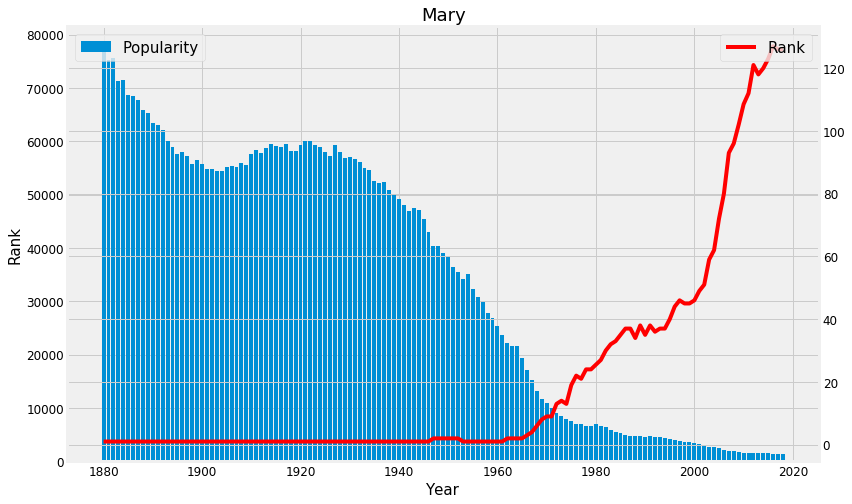

In [58]:
#Here we are simultanesouly plotting the popularity and rank for the name Mary over time
#As you can see, as the popularity dwindles, the rank goes "up" directionally but down numerically 


fig, ax1 = plt.subplots(figsize = (12,8))
#Here is the bar plot for mary's popularity
ax1.bar(x = mary.Year, height = mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
#Here is the line chart for mary's rank
ax2.plot(mary.Year, mary.Rank, color = 'red', label = 'Rank')
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [63]:
#Here we are creating a function that we can use to plot everyone's name without having to rewrite code

def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12,8))
    ax1.bar(x = data.index, height = data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = 'red', label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

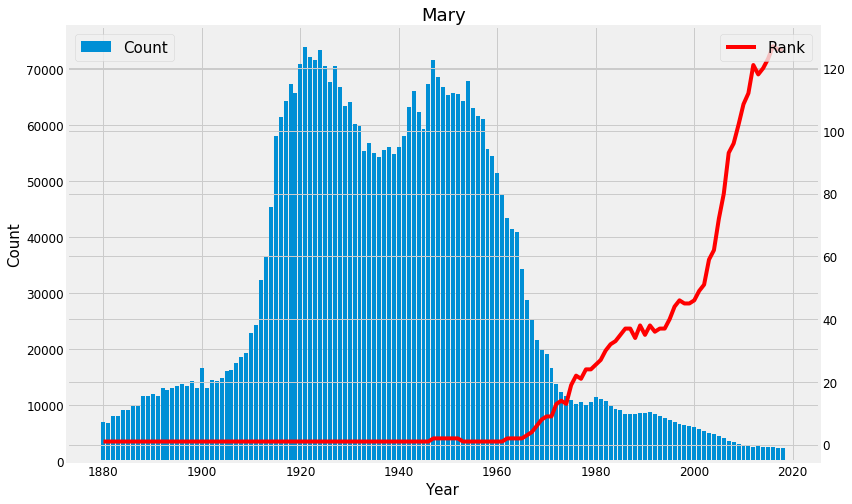

In [64]:
#Here we are plotting Mary again, but instead of popularity we are just doing raw counts

plot_name("Mary", "F", crit = "Count")

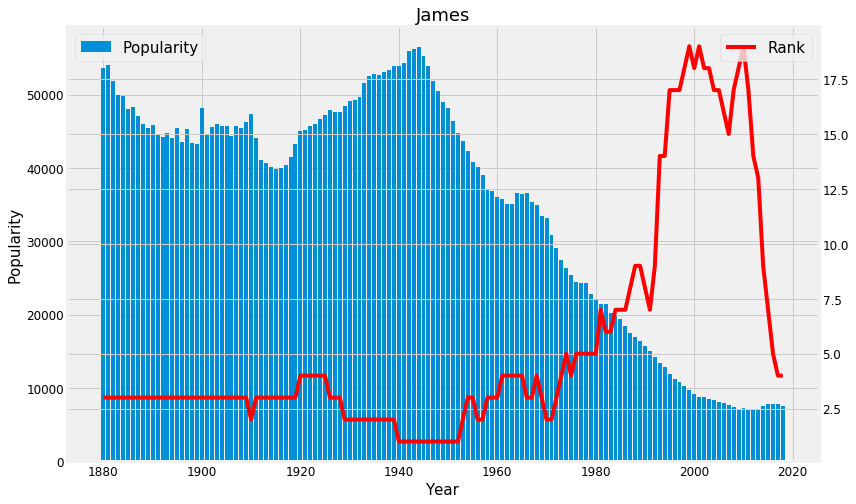

In [65]:
#Here we are plotting the popularity and rank of James over time

plot_name("James", "M")

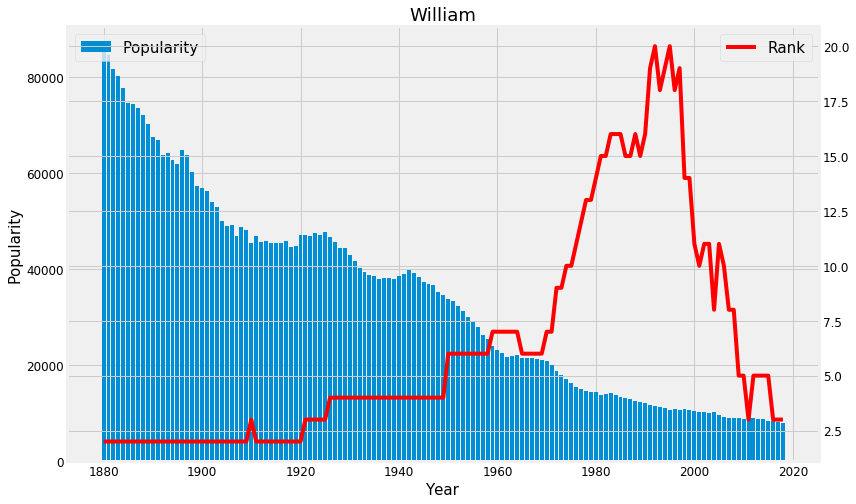

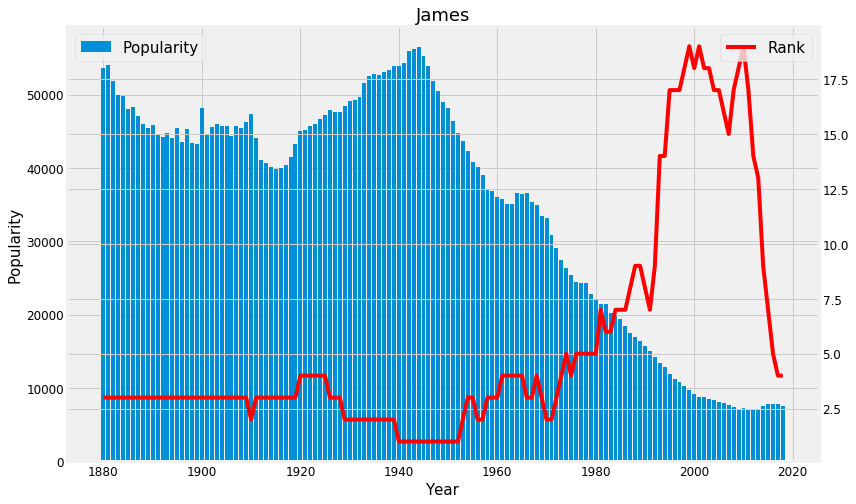

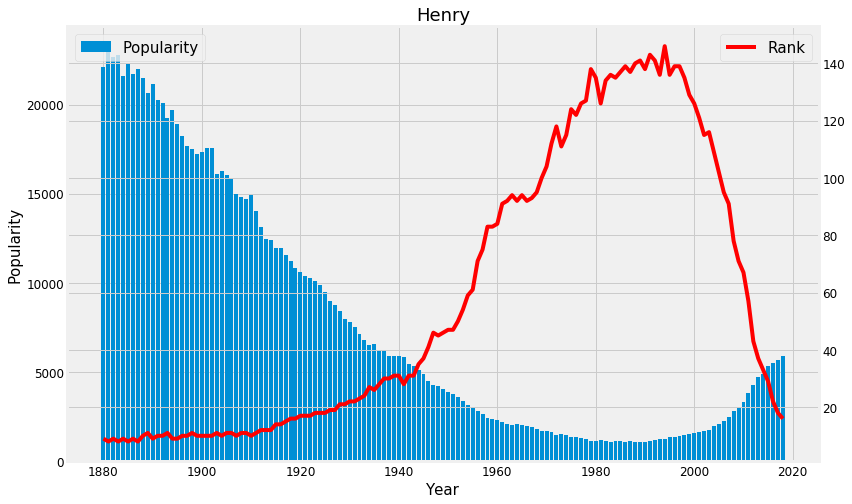

In [66]:
#Now we are running a for-loop for every male name in the evergreen dataframe, so top names over time

for name in m_evergreen.Name:
    plot_name(name, "M")

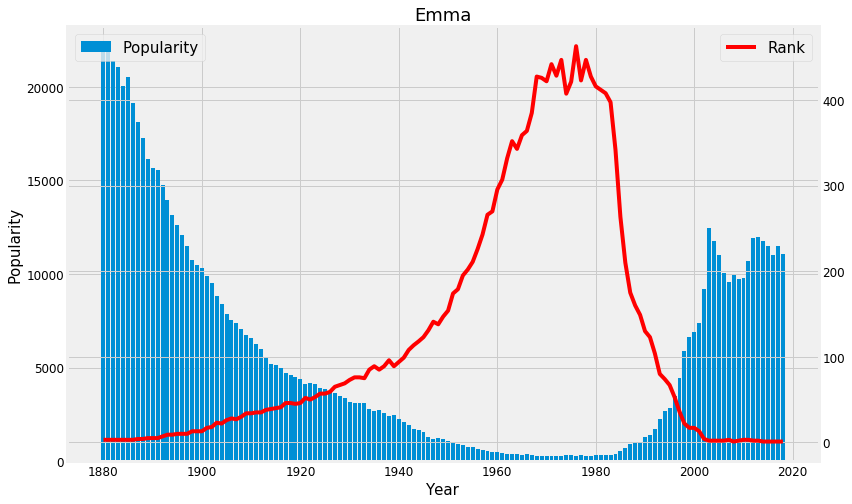

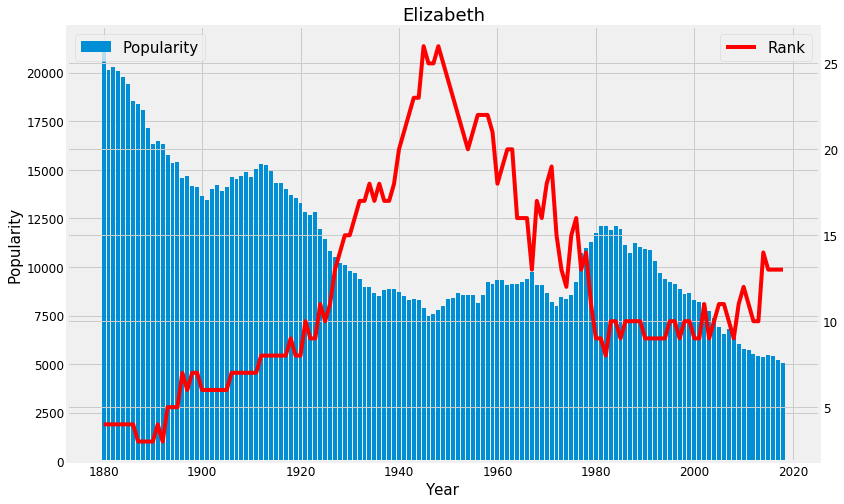

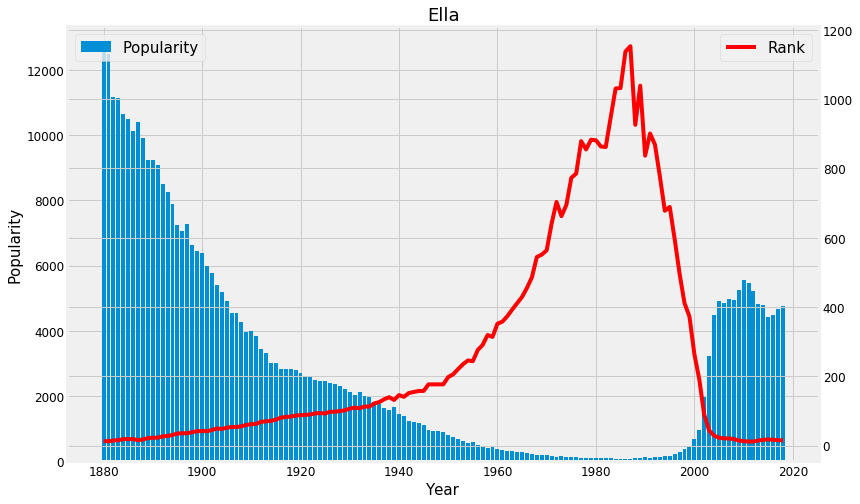

In [67]:
#Now we are running a for-loop for every female name in the evergreen dataframe, so top names over time

for name in f_evergreen.Name:
    plot_name(name, "F")

# Why Does a Name's Popularity Change?

In [68]:
#Here we are simply showing the popularity of Mary over time

df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"]

0         77642
2000      75245
3935      75551
6062      71333
8146      71439
           ... 
1793168    1477
1826414    1478
1859539    1420
1892548    1397
1925138    1379
Name: Popularity, Length: 139, dtype: float64

In [69]:
#Here we are adding the shift method to the popularity of Mary over time
#Pandas dataframe.shift() function Shift index by desired number of periods with an optional time freq. 
#This function takes a scalar parameter called the period, 
#which represents the number of shifts to be made over the desired axis. 
#This function is very helpful when dealing with time-series data
#So, obviously in the first year (1880) we don't have a number because we don't have 1879 to compare it to

df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0           NaN
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [70]:
#Here we are creating a column called "Pop_lag1" to add a lag of one year to our dataframe
#The lag is calculated on popularity

df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [71]:
#Here is a brief look at the dataframe
#as you can all the 1880 values are NaN due to no prior year to make the lag

df.head()

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN


In [72]:
#You can see the lag more clearly at the end of the dataset with years to compare it to

df.tail()

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8
1957045,2018,Zzyzx,M,5,3,13042,3


In [73]:
#Here we are taking a look at the name Ashanti over time
#Looks like we have male and female Ashantis

df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,NaN
708512,1970,Ashanti,M,14,8,2565,NaN
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [74]:
#Here we are replacing all null values with a 0

df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [75]:
#Now we are looking at Ashanti again and it looks nicer with the zeroes

df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,0
708512,1970,Ashanti,M,14,8,2565,0
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [76]:
#Here we are creating a new column called "pop_diff"
#We are taking the difference between Popularity and the lag of popularity

df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [77]:
#Here we are looking at Mary over time again, now with popularity difference over time

df.loc[(df.Name == "Mary") & (df.Gender == "F")]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,NaN,NaN
2000,1881,Mary,F,6919,75245,1,77642,-2398
3935,1882,Mary,F,8148,75551,1,75245,307
6062,1883,Mary,F,8012,71333,1,75551,-4219
8146,1884,Mary,F,9217,71439,1,71333,107
...,...,...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120,1514,-37
1826414,2015,Mary,F,2631,1478,123,1477,1
1859539,2016,Mary,F,2508,1420,127,1478,-58
1892548,2017,Mary,F,2402,1397,126,1420,-23


In [78]:
#Here we are creating a separate dataframe based just on data from 1900 on

df2 = df[df.Year >= 1900].copy()

In [79]:
#Here we are finding the top 20 popularity differences in our dataframe
#Linda in 1947 was the greatest

df2.nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236,1,33547,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156
711426,1971,Jennifer,F,56783,34134,1,26403,7730
726721,1972,Jennifer,F,63603,41813,1,34134,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861
751941,1973,Jason,M,46683,29940,3,23081,6859
844807,1979,Amanda,F,31928,19890,3,13394,6496
696647,1970,Jennifer,F,46157,26403,1,19978,6425


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


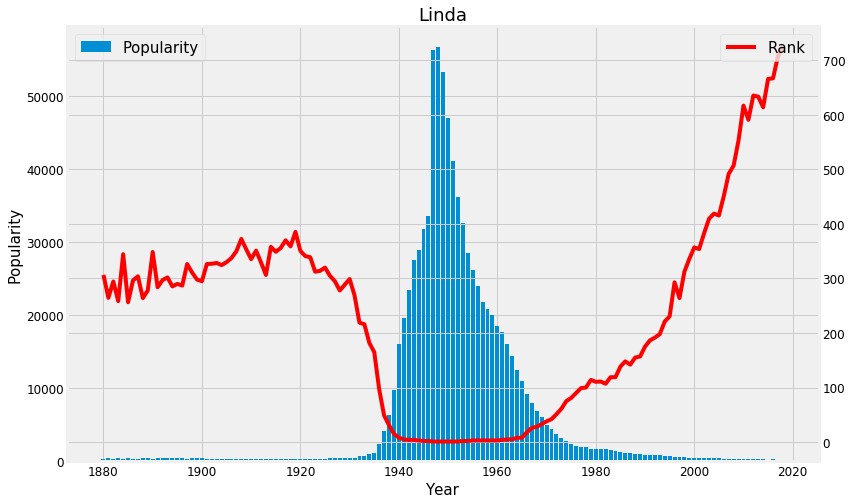

In [81]:
#Here we will plot Linda for a closer look

plot_name("Linda", "F")

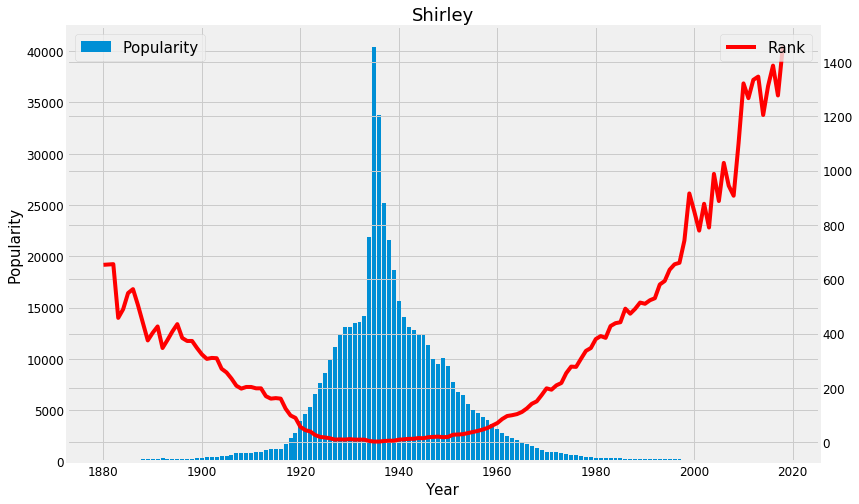

In [82]:
#Here we will plot Shirley for a closer look

plot_name("Shirley", "F")

In [83]:
#Here we are finding the top 20 smallest popularity differences in our dataframe
#Shirley in 1937 was the smallest

df2.nsmallest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
339412,1937,Shirley,F,26816,25204,4,33798,-8593
330516,1936,Shirley,F,35161,33798,2,40398,-6601
461947,1950,Linda,F,80431,46952,1,53199,-6248
472250,1951,Linda,F,73978,41079,1,46952,-5872
961380,1985,Jennifer,F,42651,24789,3,30032,-5243
482712,1952,Linda,F,67082,36174,1,41079,-4905
696648,1970,Lisa,F,38963,22288,2,26692,-4404
437173,1947,Richard,M,58521,31990,5,36252,-4263
537623,1957,Deborah,F,40071,19601,6,23827,-4226
504196,1954,Linda,F,55381,28520,2,32572,-4052


# Why Does a Name's Popularity Change Part Two

In [84]:
#Here we are filtering our df2 dataset by Pop_lag1 less than 5
#Then we are looking for the 20 largest names by popularity difference
#Looks like Nakia has the greatest difference

df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
758040,1974,Nakia,F,1134,773,226,5,768
808621,1977,Kizzy,F,1116,728,223,0,728
1060680,1989,Christop,M,1082,541,242,0,541
768358,1974,Nakia,M,612,389,302,0,389
820064,1977,Levar,M,523,318,342,0,318
645832,1966,Tabatha,F,500,296,419,3,293
1553888,2007,Jaslene,F,501,261,600,3,258
1223510,1996,Moesha,F,426,243,548,0,243
1070200,1990,Isamar,F,446,235,534,0,235
961890,1985,Sade,F,393,228,512,0,228


In [85]:
#Here we are tooking a closer look at Nakia over time

df2[df2.Name == "Nakia"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
749309,1973,Nakia,F,7,5,7049,0,5
758040,1974,Nakia,F,1134,773,226,5,768
768358,1974,Nakia,M,612,389,302,0,389
774314,1975,Nakia,F,972,667,251,773,-106
785009,1975,Nakia,M,514,329,338,389,-60
...,...,...,...,...,...,...,...,...
1834158,2015,Nakia,F,15,8,7792,11,-2
1854673,2015,Nakia,M,8,4,9138,5,-1
1865530,2016,Nakia,F,21,12,6072,8,3
1906059,2017,Nakia,F,7,4,13370,12,-8


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


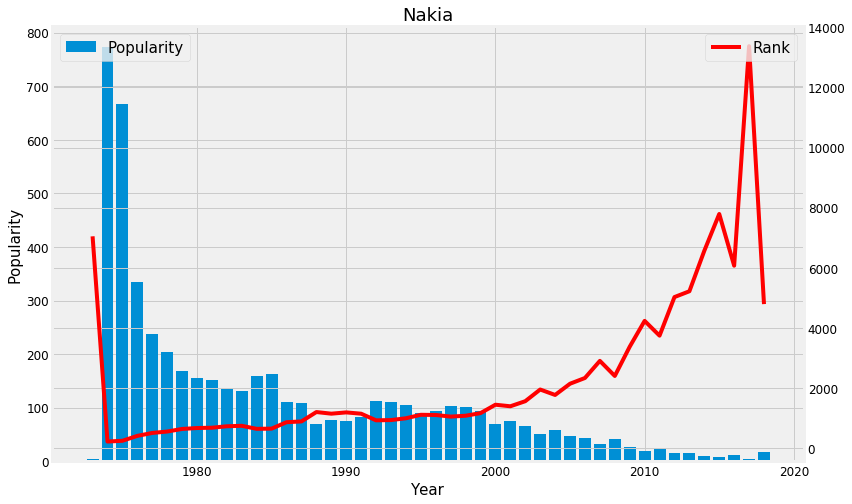

In [86]:
#Here we are plotting the popularity of female Nakias over time

plot_name("Nakia", "F")

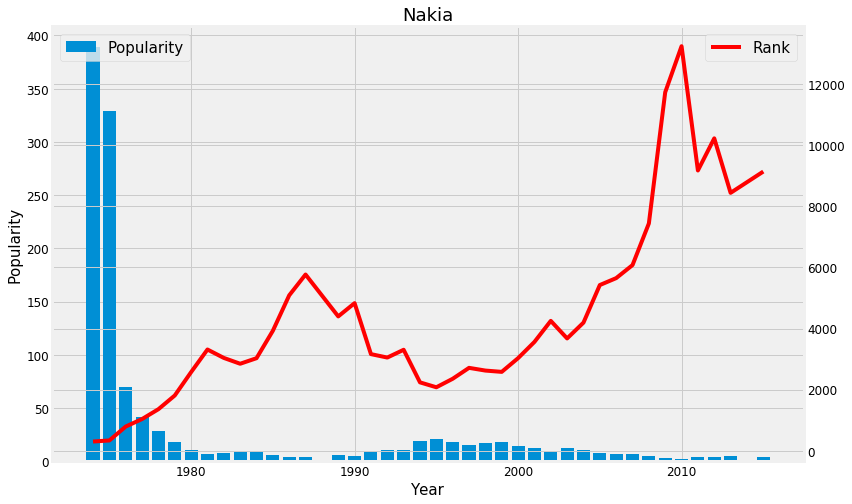

In [87]:
#Here we are plotting the popularity of male Nakias over time

plot_name("Nakia", "M")

In [88]:
#Here we are creating a new column called %change
#We are diving the popularity column by the pop_lag1 column
#We then subtract 1, then multiply by 100
#So [(x/y) - 1] x 100

df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [89]:
#Here is a look at the dataframe with the new percentage change column added

df2.head()

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
52265,1900,Mary,F,16706,55724,1,56527,-802,-1
52266,1900,Helen,F,6343,21158,2,21663,-506,-2
52267,1900,Anna,F,6114,20394,3,21951,-1557,-7
52268,1900,Margaret,F,5304,17692,4,18234,-542,-3
52269,1900,Ruth,F,4765,15894,5,16788,-894,-5


In [90]:
#Here we are filtering our dataset by those that have a pop_lag1 of over 1000
#Then, we are choosing the 20 smallest names based on percentage change
#Katina looks like the winner with -69% change in 1974

df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
758121,1974,Katina,F,765,521,307,1697,-1175,-69
1119924,1992,Iesha,F,581,315,432,1011,-696,-69
1423744,2003,Ashanti,F,962,527,325,1640,-1113,-68
515370,1955,Marian,F,1499,767,208,2067,-1300,-63
175401,1920,Woodrow,M,774,727,182,1845,-1117,-61
1145180,1993,Hillary,F,1064,588,261,1367,-779,-57
1249716,1997,Shania,F,861,495,330,1047,-552,-53
54563,1900,Dewey,M,345,2293,75,4698,-2406,-51
275072,1930,Jeannine,F,593,527,258,1060,-533,-50
981635,1986,Sheena,F,1573,917,173,1780,-863,-48


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


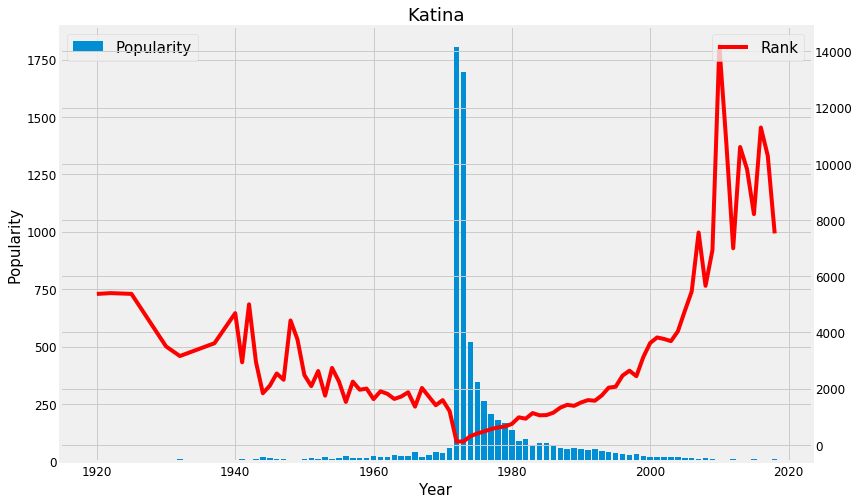

In [91]:
#Here we are plotting the popularity of female Katinas over time

plot_name("Katina", "F")

# Persistant vs. Spike Fade Names

In [92]:
#Here we are creating a new column called "Spike Score"
#We are diving the max count column by the total column, then multiplying it by 100


agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [93]:
#Here we are sorting the dataframe by the spike score column we just created

agg.sort_values(by = "Spike_Score", ascending = True).head()

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
49192,Joseph,M,2613304,139,1880,2018,32732,1956,1
30706,Elizabeth,F,1638349,139,1880,2018,20744,1990,1
85133,Rosa,F,174125,139,1880,2018,2230,1925,1
69242,Maurice,M,134504,139,1880,2018,1743,1921,1
25419,Delia,F,36276,139,1880,2018,491,1957,1


In [94]:
#Here we are creating a separate dataframe based on the top 20 spike scores

pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [95]:
#Here is what that looks like

pers

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
49192,Joseph,M,2613304,139,1880,2018,32732,1956,1
30706,Elizabeth,F,1638349,139,1880,2018,20744,1990,1
85133,Rosa,F,174125,139,1880,2018,2230,1925,1
69242,Maurice,M,134504,139,1880,2018,1743,1921,1
25419,Delia,F,36276,139,1880,2018,491,1957,1
21172,Cornelius,M,35764,139,1880,2018,485,1974,1
28009,Domingo,M,13797,121,1882,2018,190,1946,1
68440,Marshall,M,91352,139,1880,2018,1270,1947,1
97753,Teodoro,M,3079,111,1884,2018,43,1969,1
103320,Victor,M,317673,139,1880,2018,4444,1990,1


In [96]:
#Here we are creating a list of name-gender pairs

l = list(zip(pers.Name, pers.Gender))

In [97]:
#Here is what that list looks like

l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


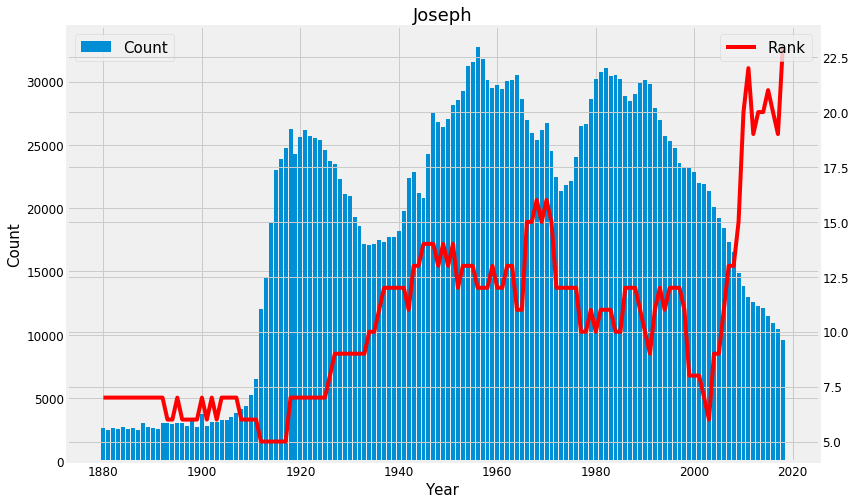

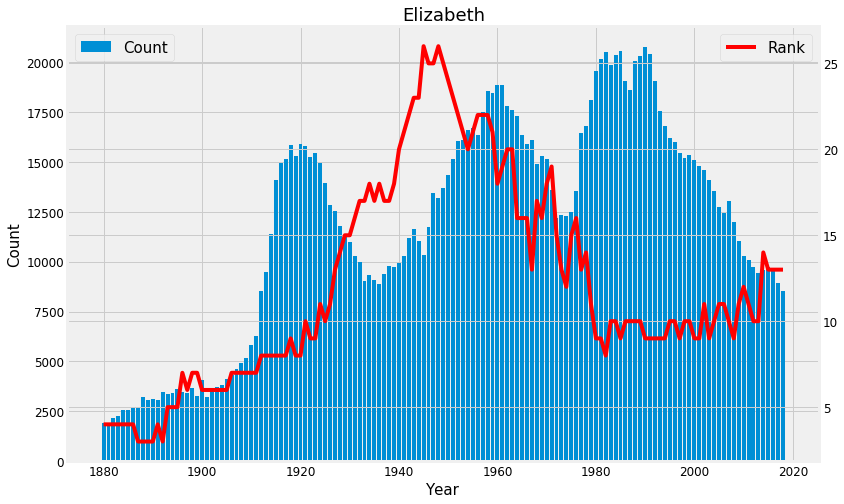

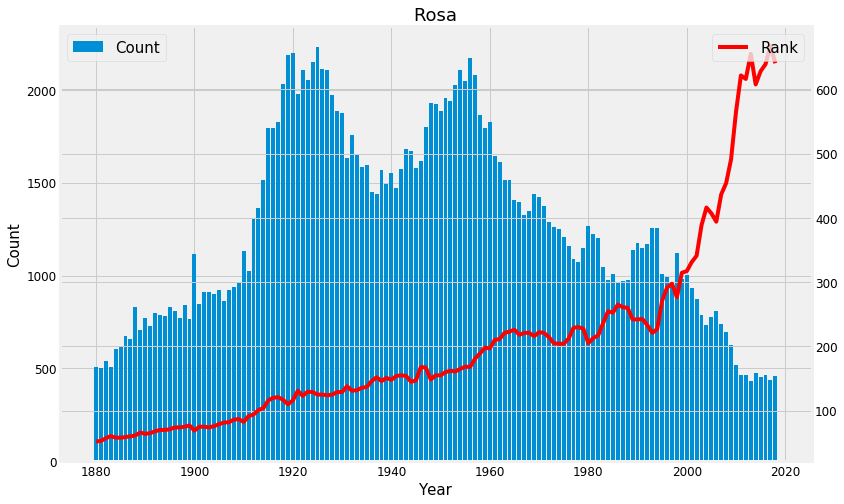

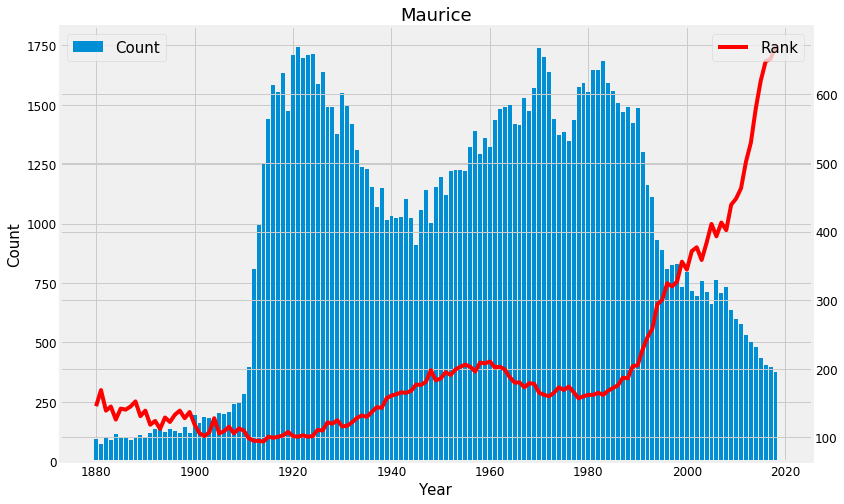

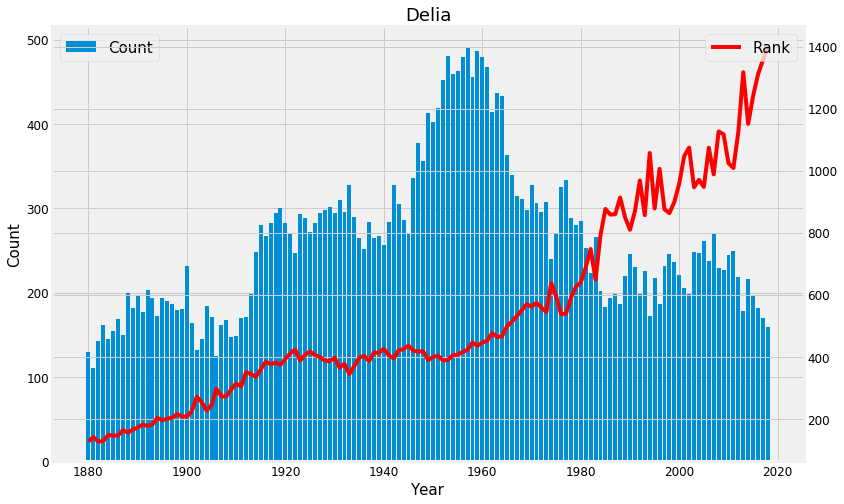

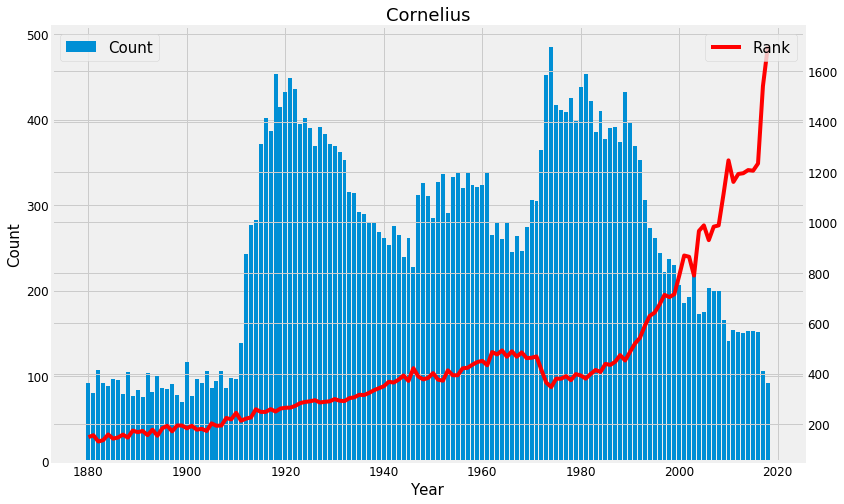

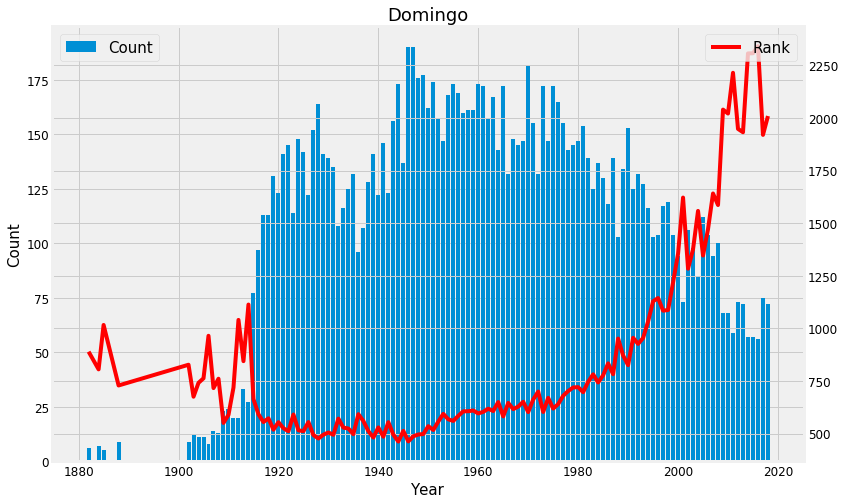

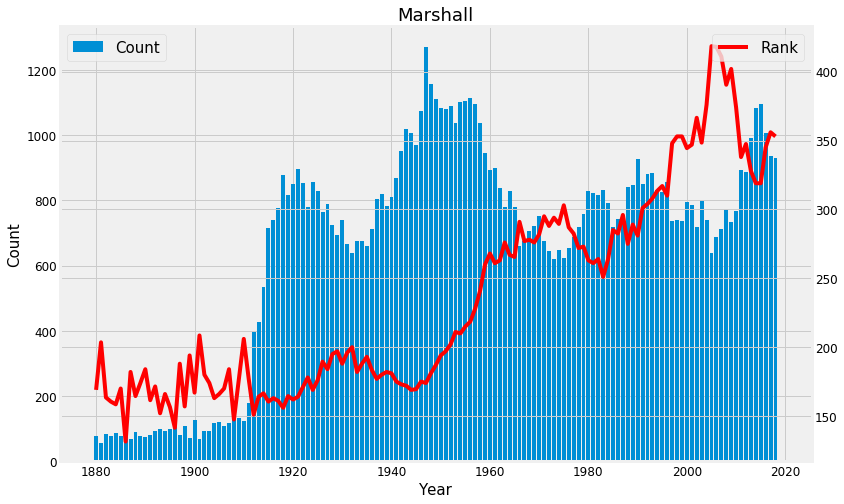

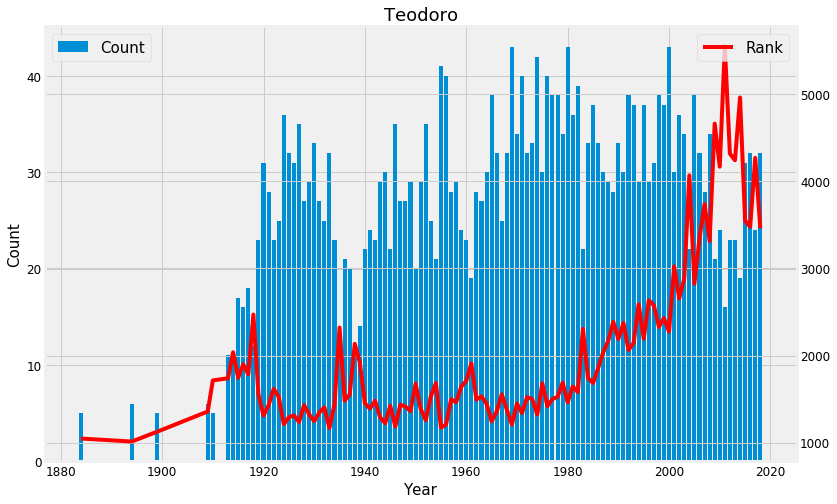

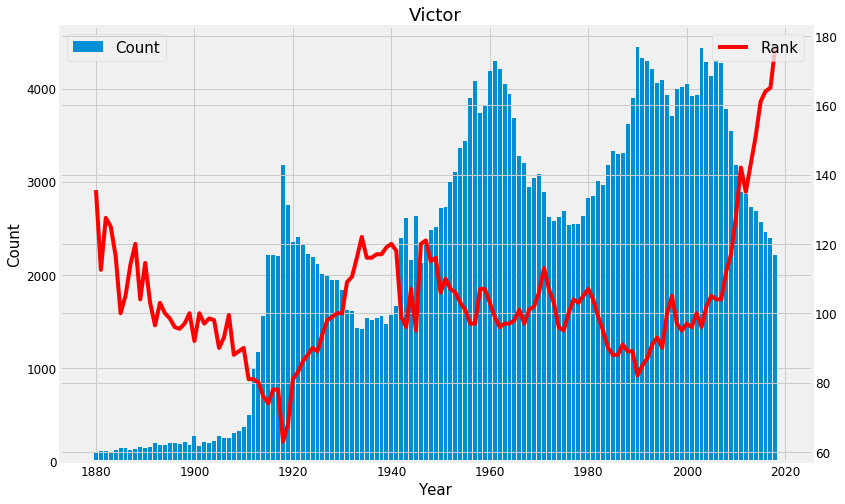

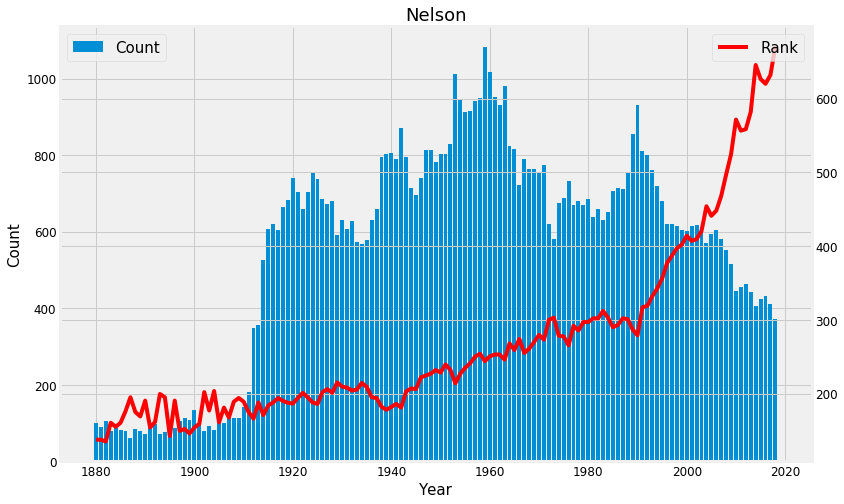

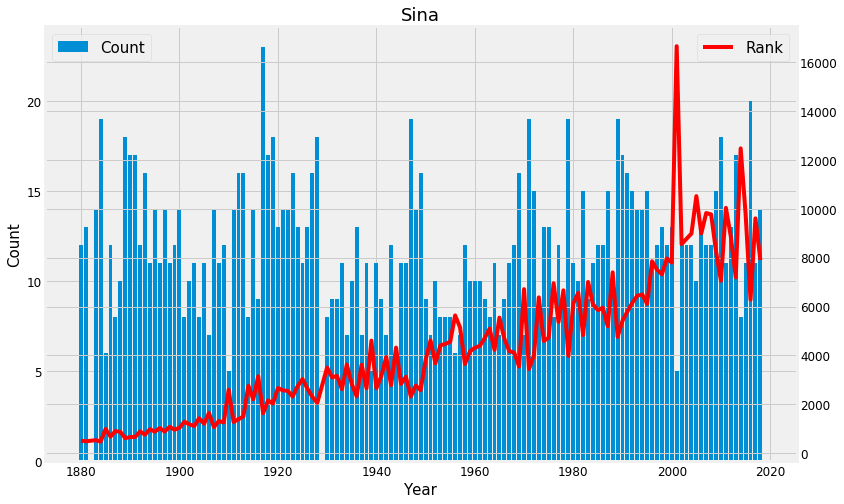

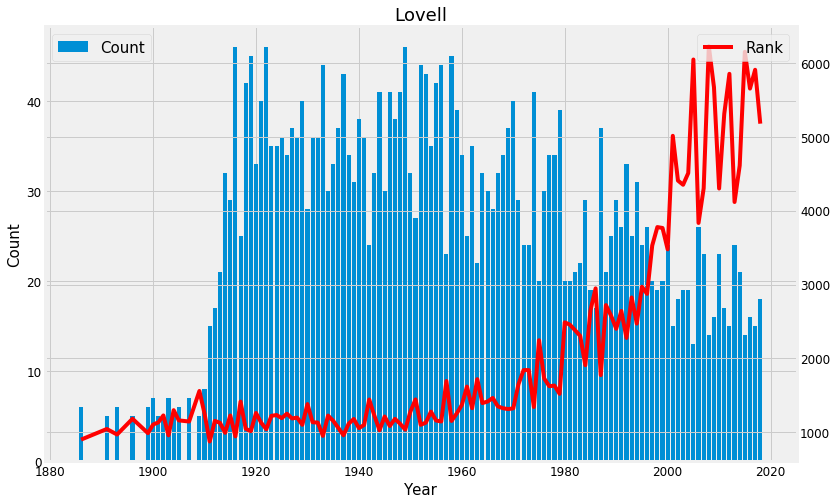

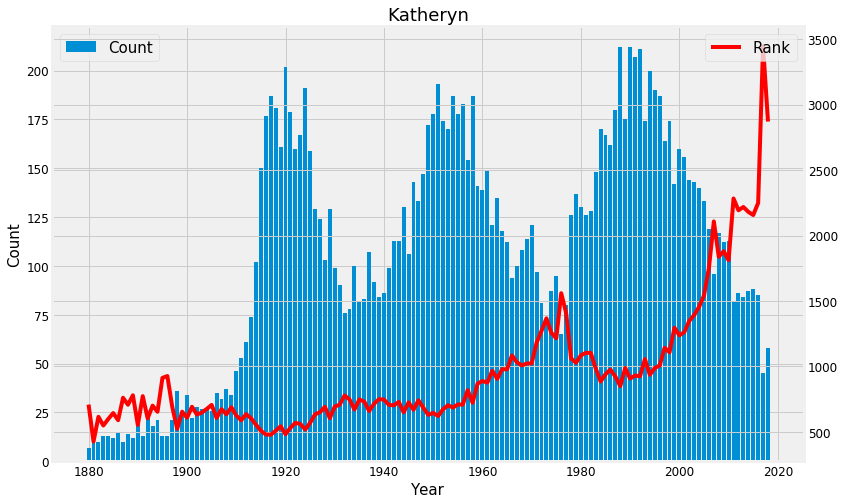

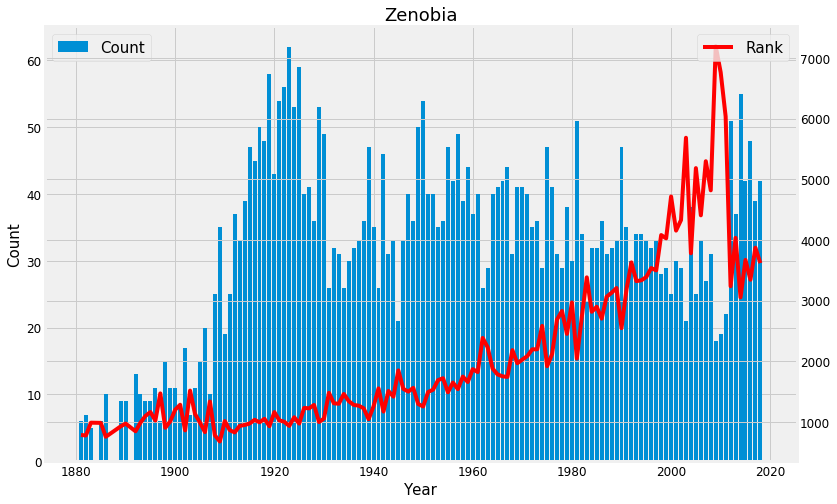

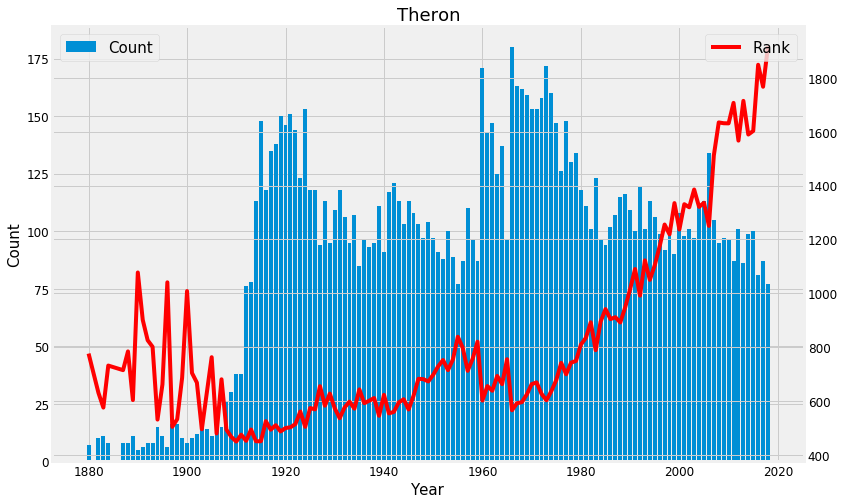

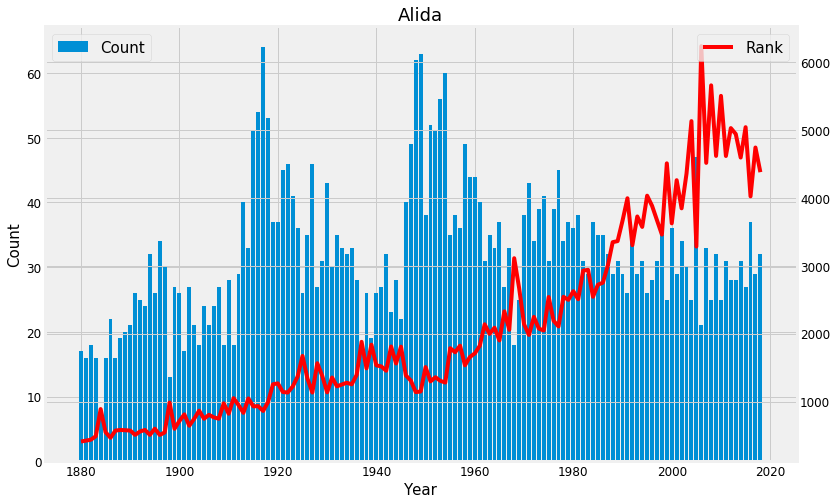

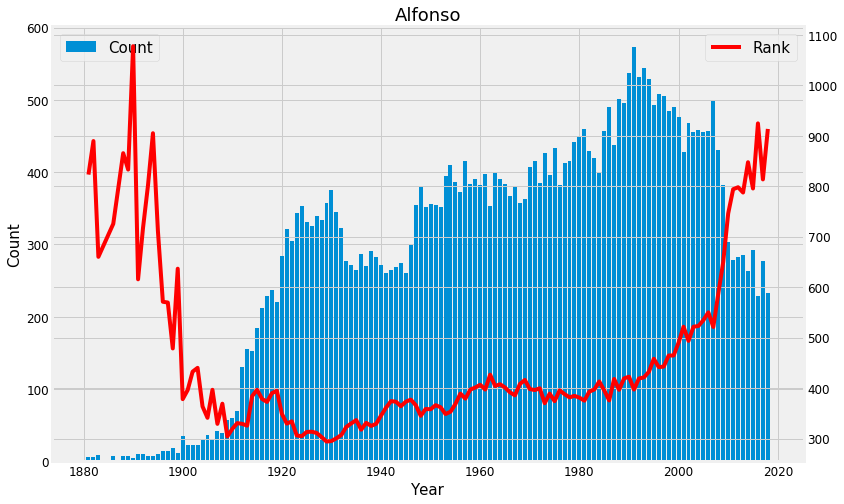

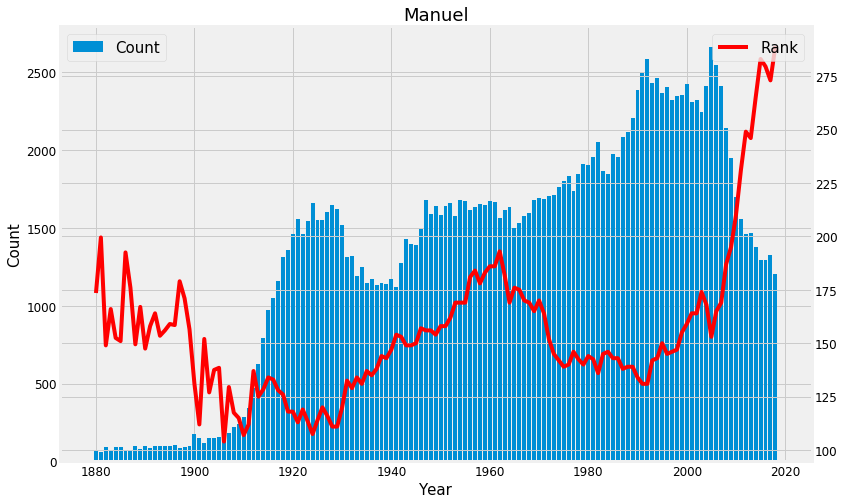

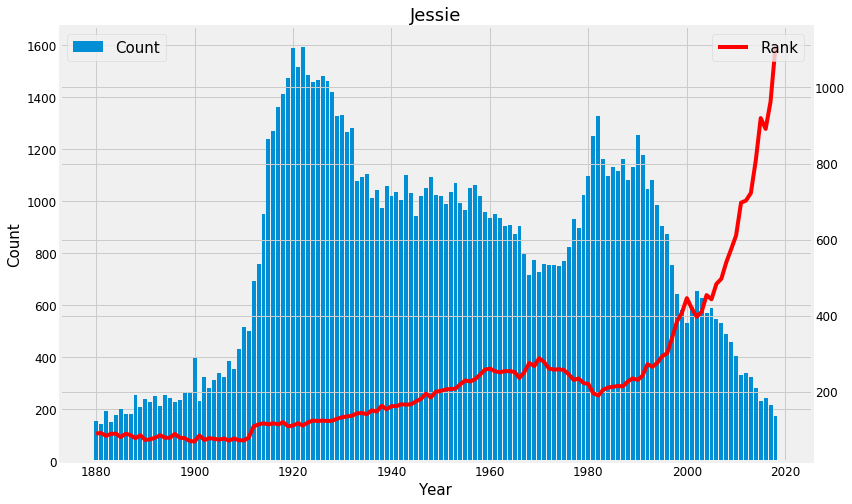

In [98]:
#Here we are creating a for loop
#We will iterate over the name-gender list we created above
#Then we will visualize the popularity of these names 

for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [99]:
#Here we are creating a new dataframe called spike
#We are filtering total greater than 1000 and no_year greater than ten
#We are then sorting by the top 20 according to spike score

spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score", ascending = False).head(20)

In [100]:
#Here is what that looks like

spike

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
57027,Kizzy,F,2325,30,1977,2016,1116,1977,48
77282,Oaklyn,F,1381,11,2006,2018,627,2018,45
25998,Deneen,F,3603,52,1947,2007,1604,1964,45
72223,Moesha,F,1067,14,1996,2014,426,1996,40
67328,Mareli,F,1038,22,1995,2018,411,2008,40
67337,Marely,F,2606,29,1989,2018,1004,2008,39
51914,Kanye,M,1334,17,2002,2018,509,2004,38
50988,Kairo,M,1632,24,1995,2018,605,2018,37
97720,Tennille,F,2172,32,1975,2012,769,1976,35
31996,Ensley,F,1241,20,1997,2018,432,2018,35


In [101]:
#Here we are creating another name-gender pair list, but based on the spike dataframe

l2 = list(zip(spike.Name, spike.Gender))

In [102]:
#Here is what that list looks like

l2

[('Kizzy', 'F'),
 ('Oaklyn', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Mareli', 'F'),
 ('Marely', 'F'),
 ('Kanye', 'M'),
 ('Kairo', 'M'),
 ('Tennille', 'F'),
 ('Ensley', 'F'),
 ('Kadijah', 'F'),
 ('Everleigh', 'F'),
 ('Catina', 'F'),
 ('Shaquille', 'M'),
 ('Royalty', 'F'),
 ('Allisson', 'F'),
 ('Nakia', 'M'),
 ('Aitana', 'F'),
 ('Kashton', 'M'),
 ('Jaslene', 'F')]

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


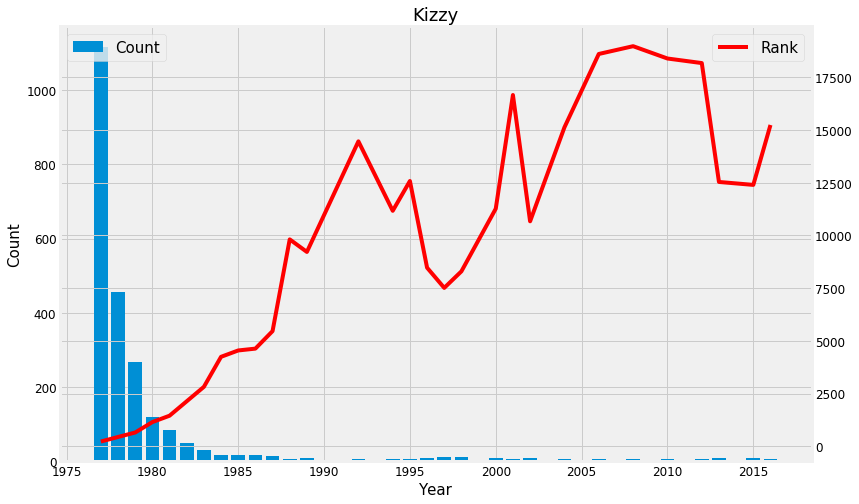

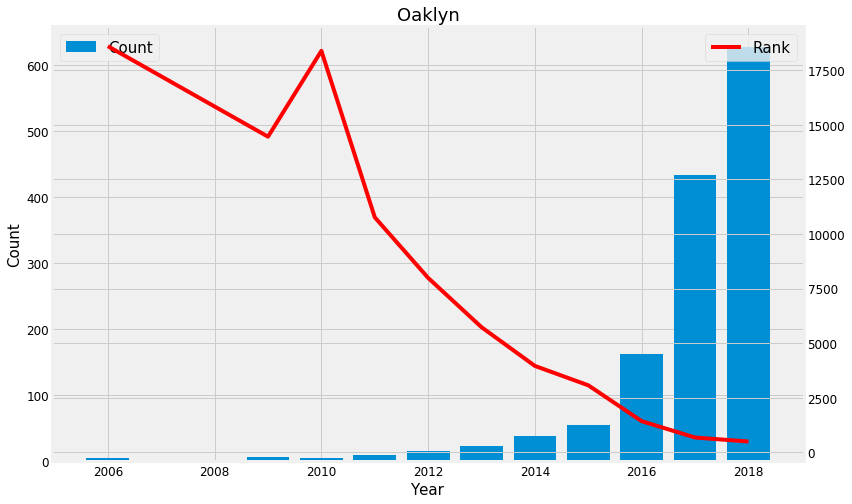

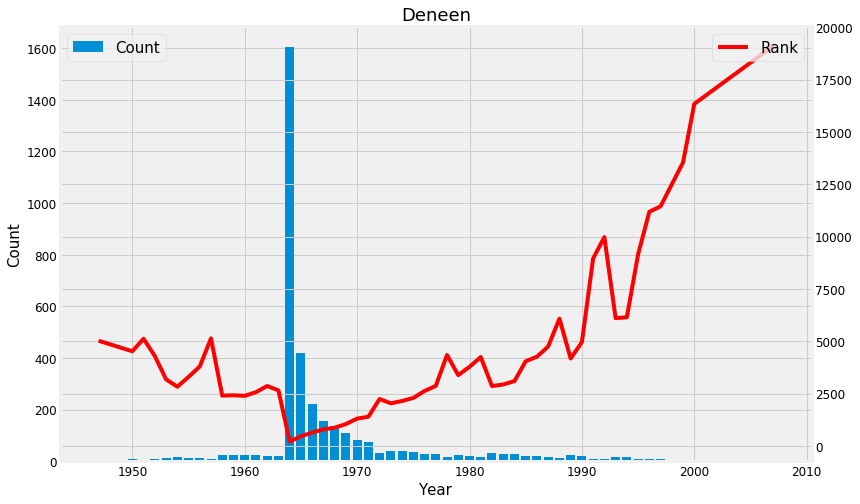

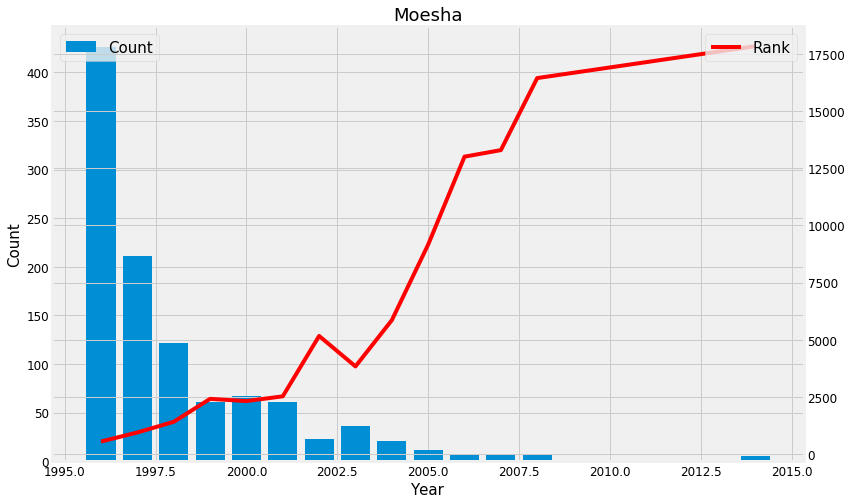

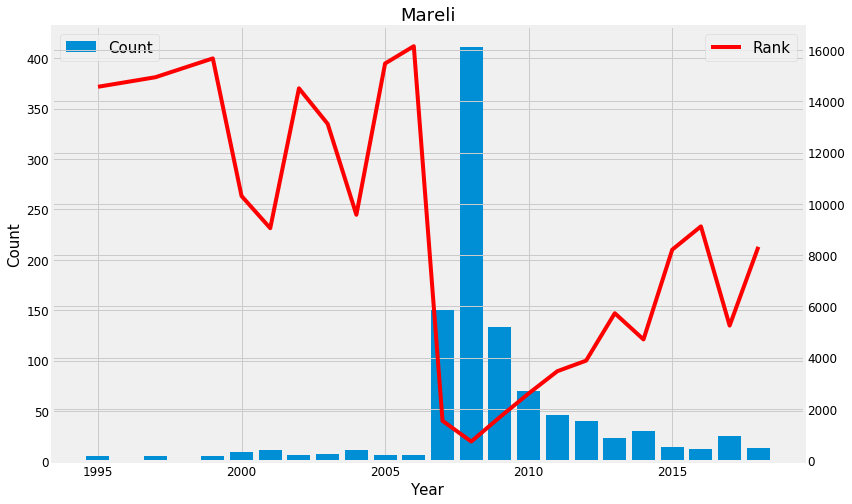

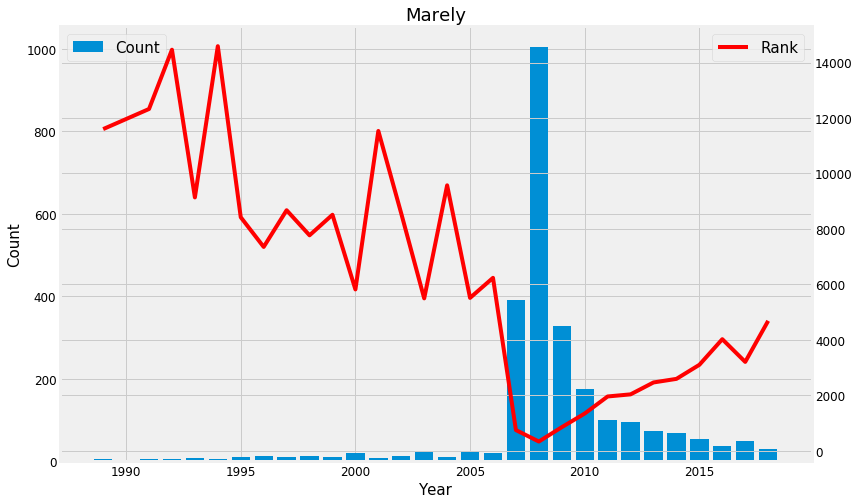

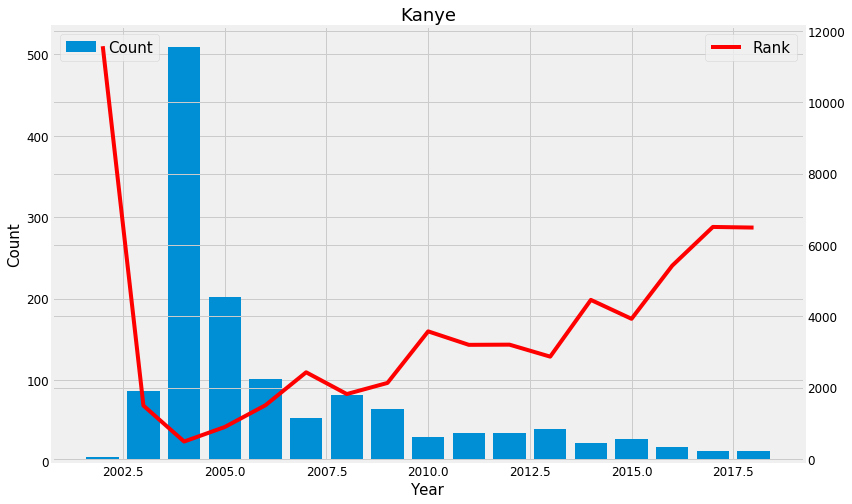

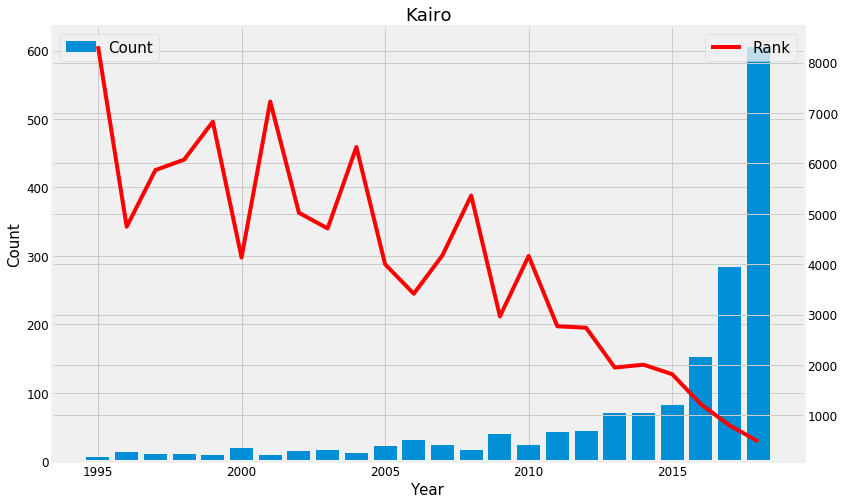

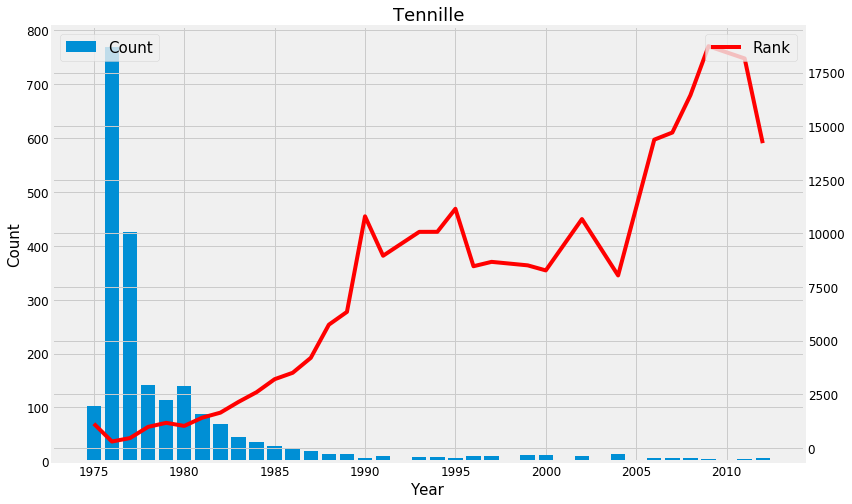

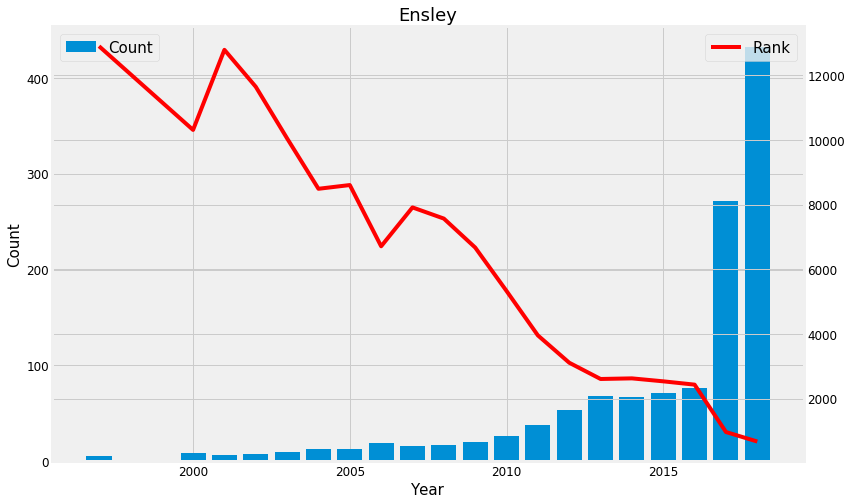

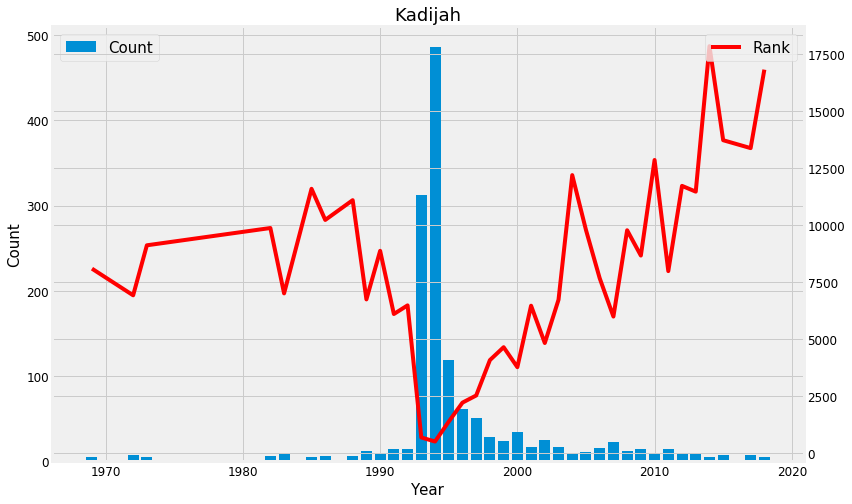

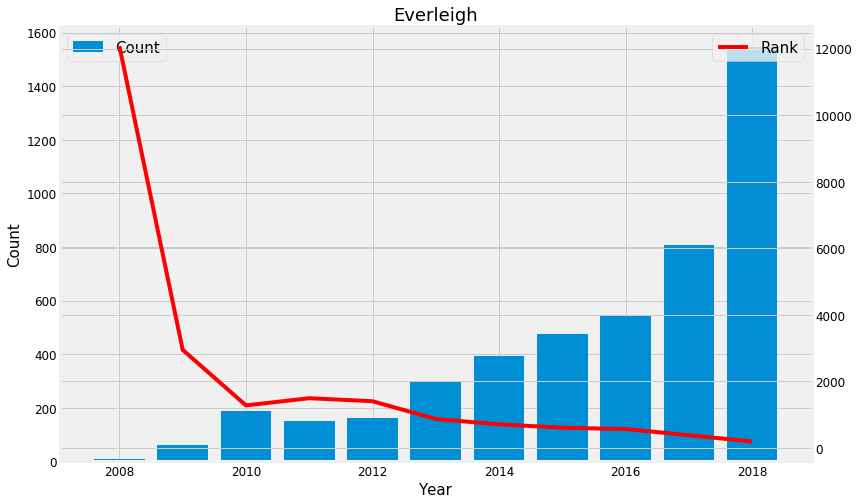

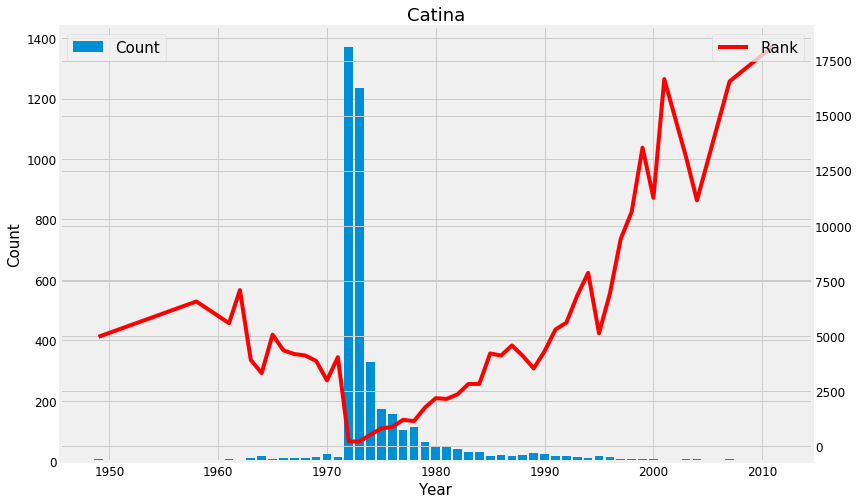

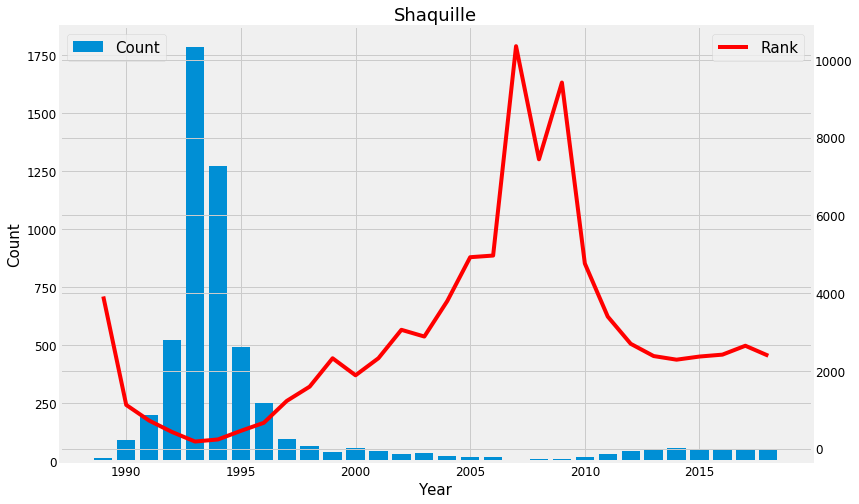

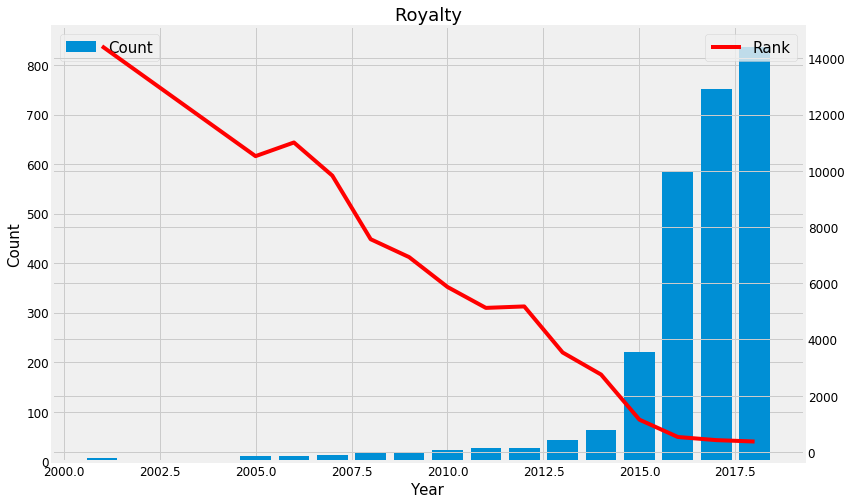

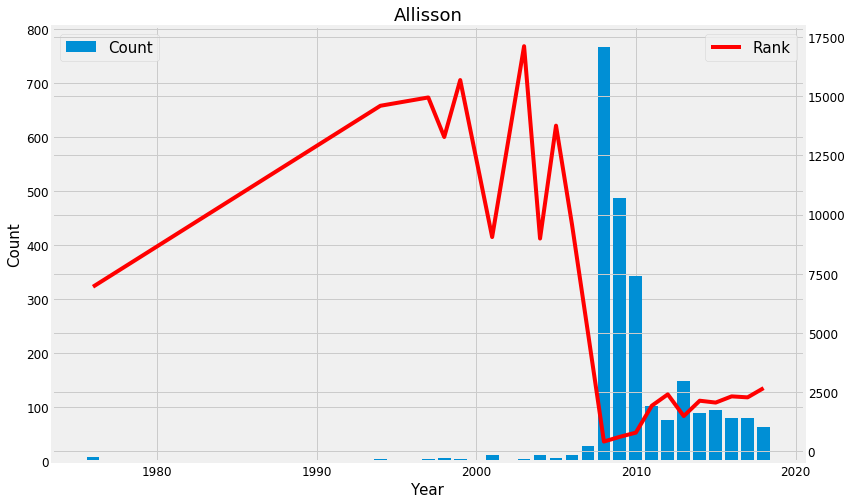

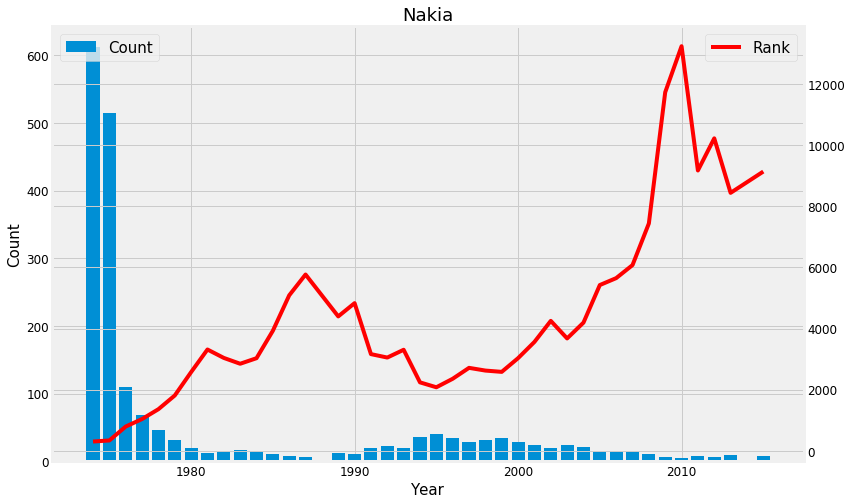

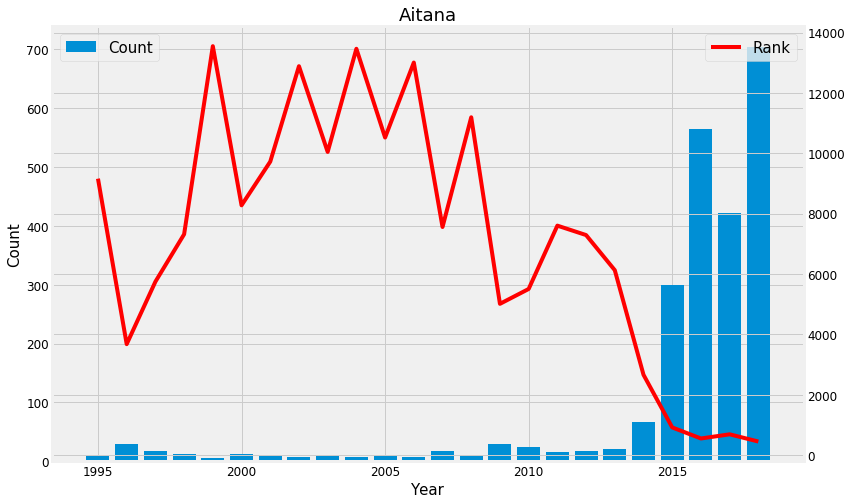

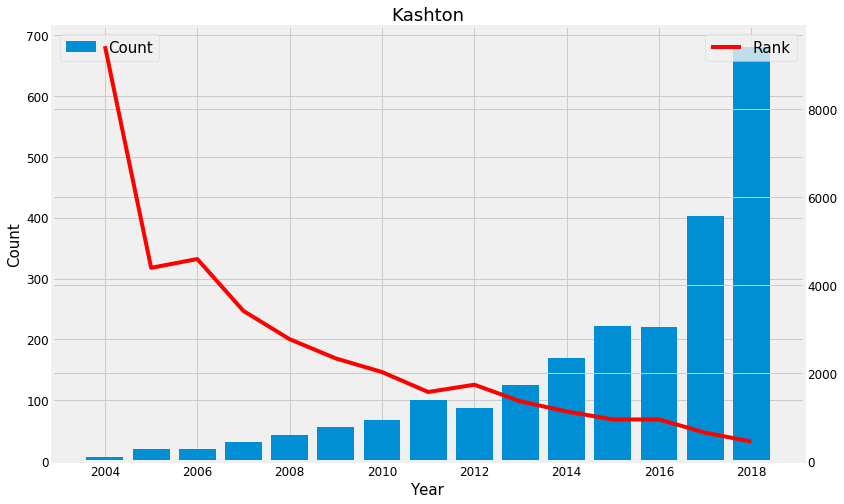

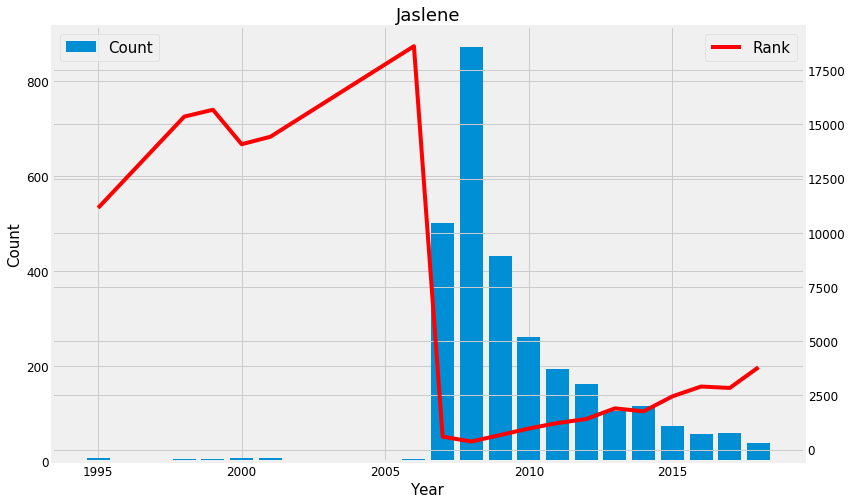

In [103]:
#Here we are creating a for loop
#We will iterate over the name-gender list we created above
#Then we will visualize the popularity of these names 

for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

# Most Popular Unisex Names

In [104]:
#Here we are counting all the Marys in the dataset. Both male and female

df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [105]:
#Here is another way to visualize the name breakdown by gender

df.groupby(["Name", "Gender"]).Count.sum().unstack()

Gender,F,M
Name,,
Aaban,NaN,114
Aabha,35,NaN
Aabid,NaN,16
Aabidah,5,NaN
Aabir,NaN,10
...,...,...
Zyvion,NaN,5
Zyvon,NaN,7
Zyyanna,6,NaN


In [106]:
#Here we are creating a separate dataframe based on the gender breakdown we did just above

unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()

In [107]:
#Here is what that looks like

unisex.head()

Gender,F,M
Name,,
Aaban,NaN,114
Aabha,35,NaN
Aabid,NaN,16
Aabidah,5,NaN
Aabir,NaN,10


In [108]:
#Here we are dropping all null values from the dataframe

unisex.dropna(inplace = True)

In [109]:
#Here is what the dataframe looks like now

unisex.head()

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96


In [110]:
#Here we are finding the most popular unisex names
#Willie, Jordan, Leslie are the top 3

unisex.min(axis = 1).sort_values(ascending = False)

Name
Willie   146156
Jordan   131004
Leslie   112726
Taylor   110390
Jessie   110212
          ...  
Hany          5
Hao           5
Haram         5
Harjap        5
Aaden         5
Length: 10773, dtype: float64

In [113]:
#Here we are passing the most popular names to a separate dataframe called unisex_names

unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index

In [114]:
#Now we are using the unisex_names to filter our unisex dataframe

unisex.loc[unisex_names].head(20)

Gender,F,M
Name,,
Willie,146156,448946
Jordan,131004,374513
Leslie,267081,112726
Taylor,320446,110390
Jessie,167462,110212
Terry,96895,422916
Angel,95710,231800
Riley,106901,94278
Jamie,268102,85631


In [115]:
#Here we are filtering names that have at least 10000 values in them

unisex = unisex[unisex.min(axis = 1) > 10000]

In [116]:
unisex

Gender,F,M
Name,,
Addison,121435,12895
Adrian,15258,237044
Alexis,338333,63604
Amari,14415,17932
Angel,95710,231800
...,...,...
Tommie,17415,34210
Tracy,250853,61223
Tyler,16585,587571


In [117]:
#We are trying to find names that are plit 50-50 between genders
#We are dividing the female column by the male column and taking the absolute value of that number, so no negatives

abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0
Quinn        0
Kerry        0
Blair        0
Kris         0
            ..
Stacey      10
Courtney    10
Jean        18
Ashley      53
Mary       271
Length: 116, dtype: float64

In [118]:
#Here we are creating a separate dataframe based on that ratio

unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index

In [120]:
#Now we are filtering the original unisex dataframe using the ratio unisex_names2 dataframe
#These are the names that are closely split and their full gender counts

unisex.loc[unisex_names2].head(20)

Gender,F,M
Name,,
Elisha,13762,13595
Quinn,31670,32071
Kerry,48549,49646
Blair,14922,14527
Kris,13504,14055
Robbie,22290,20926
Justice,16354,17580
Riley,106901,94278
Emerson,20904,24472
